### Codio Activity 22.6: Using a Neural Net for Non-concentric Data

**Expected Time = 60 minutes** 

**Total Points = 20** 

This activity focuses on using a neural network to classify a dataset that does not have an obvious linear boundary.  An important idea about the neural net is its ability to solve such problems with high accuracy.  The dataset you will use is created using scikit-learn, and is meant to mimic that from the videos.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


warnings.filterwarnings('ignore')

2024-12-03 16:42:24.449736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### The Data

Below, a dataset is manufactured to have four centers, and these are then combined to form a binary classification problem.  The data is created and visualized below using the `make_blobs` function.

In [5]:
X, y = make_blobs([50, 50, 50, 50], centers = [[0, 5], [5, 0], [5, 5], [0, 0]],
                 random_state=42)

In [7]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

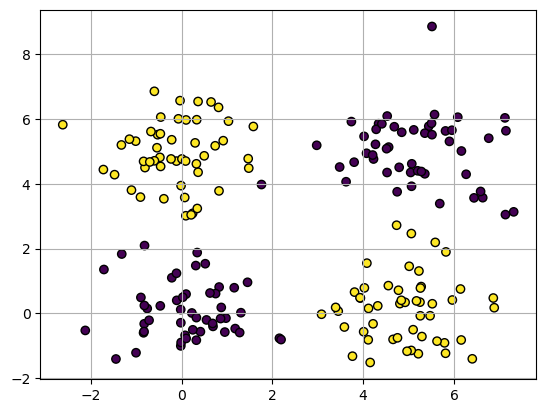

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'black')
plt.grid();

[Back to top](#-Index)

### Problem 1

#### The Network Architecture

**10 Points**

Below, create a model named `model` that builds a `keras` network with the `Sequential` model and appropriate architecture to acheive better than 90% accuracy on the entire dataset.  Assign the trained model to the `history` variable as before.

In [5]:
### GRADED
model = ''
    
### BEGIN SOLUTION
model = Sequential([Dense(100, activation = 'relu'), 
                   Dense(1, activation = 'sigmoid')])
model.compile(loss = 'bce', metrics = ['acc'])
history = model.fit(X, y, epochs = 100, verbose = 0, validation_split = 0.2)
### END SOLUTION

### ANSWER CHECK
print(history.history['acc'][-1])

2023-09-12 19:09:49.154659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-12 19:09:49.154724: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-12 19:09:49.154762: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (haltlithium-beautymobile): /proc/driver/nvidia/version does not exist
2023-09-12 19:09:49.157807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.981249988079071


In [6]:
### BEGIN HIDDEN TESTS
best_acc = 0.9
#
#
#
assert history.history['acc'][-1] >= best_acc
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### How many epochs are necessary

**10 Points**

An important consideration is not wasting energy in over training your data.  Based on a visualization of your loss function, was there a point of diminishing returns?  If so, can you identify it?  Assign your answer for what you believe an optimal number of epochs for training as `epochs`.  Below is an example of a model trained for 1000 epochs on the current dataset.

![](images/overtrain.png)

In [7]:
### GRADED
epochs = ''
    
### BEGIN SOLUTION
epochs = 20
### END SOLUTION

### ANSWER CHECK
print(epochs)

20


In [8]:
### BEGIN HIDDEN TESTS
ans = 2
#
#
#
assert epochs >= ans
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3 (non-graded)

#### Draw a Decision Boundary

As an extra exercise, create a visualization of the networks decision boundary by creating a grid of points, making predictions based on these points, and using the `countourf` plot in `matplotlib`.  